# **Astrocyte Calcium Dynamics**

---

Astrocytes are the main glial cell in the brain. They have been shown to play an important role on different brain functions through their interaction with neurons, from energy supply from blood vessels to information processing by Calcium waves. Astrocytes communicate directly with neurons at the so called tripartite synapse. At the synaptic cleft, Astrocytes modulate the synaptic transmission by the uptake of neurotransmitters and the subsequent liberation of glio-transmitters, which is regulated by the processes of Calcium Induced Calcium Release (CICR) that creates Calcium waves that expands inside an astrocyte and thorugh the astrocyte network.
<br>
<br>
Astrocyte release of gliotransmitter is produced by an increase in intracellular Calcium (Ca) concentration. This concentration is mediated by the second messenger IP3. An increase in IP3 concentration induce Ca release from the Endoplasmic Reticulum to the intracellular space. The increase in IP3 concentration is in turn produced by the neurotransmitters received from the synaptic cleft. We can describe the Calcium dynamics of the astrocyte by the 3 differential equations of Ullah model:

<img src='https://drive.google.com/uc?id=1C4p_iE0F1m-RhpnUMYyx80ItyjHlSQ_y' width="400" height="300">

Where the expressed current densities are given by:

<img src='https://drive.google.com/uc?id=1ou009-cDW1X17Z_zsLYZaYSYPltqo618' width="400" height="300">

Optimizing the different parameters of the Ullah model is a relevant task as it will enable better and more biologically plausible simulations of the brain, specifically of Neuron-Astrocyte networks.





# **Trust-Region Method Theory**

---



We start from the Taylor series expasion of the objective function $f$ around $x_k$ :

$f(x_k + p) = f_k + g_k^Tp + \frac{1}{2}p^T\nabla^2f(x_k + tp)p$
<br>
<br>
where $f_k = f(x_k)$, $g_k = \nabla f(x_k)$, and $t$ is a scalar in the interval $(0, 1)$.
<br>
<br>
<br>
Using a symmetric matrix $B_k$ to approximate the Hessian, $m_k$ can be defined as:

$m_k(p) = f_k + g_k^Tp + \frac{1}{2}p^TB_kp$  `(4.3)`
<br>
<br>
<br>
Thus, to obtain each step $p$, we need to find a solution for the subproblem:

$\displaystyle \min_{p \epsilon \mathbb{R}^n} m_k(p)   s.t. \|p\| \le \Delta_k$    

where $\Delta_k$ is the trust-region radius and $\|\cdot\|$ is the euclidean norm.

## **The Dogleg Method**


---

This method can be used when $B_k$ is positive definite. When it is non positive definite, we can take as an approximate solution, the vector $p$ that solves the linear vesion of `4.3`:

$p^*(\Delta) \approx - \Delta \frac{g_k}{\|g_k\|}$
<br>
<br>
<br>
When $B_k$ is positive definite we can examine the effect of the trust-region radius on the solution of the subproblem:
<br>
<br>
1.   ***Trust-region radius is greater than $p^B$***

The unconstrained minimizer of m in `4.3` is $p^B = -B_k^{-1}g$. When this point is feasible, it is a solution:

$p^*(\Delta) = p^B$,   when $\Delta \ge \|p^B\|$
<br>
<br>
If the Hessian of $f_k$ is definite positivea and computable, we can take $B_k = \nabla^2f(x_k)$. When this is the case, the solution step $p^* = p^B = -B_k^{-1}g$ is called the *full Newton step*.  
<br>
<br>
2.   ***Trust-region radius intersects with the line from the origin to $p^U$***

For intermediate values of $\Delta$, the solutuion $p^*(\Delta)$ follows a curved trajectory. The dogleg method finds an approximate solution by replacing that curve with a path consisting of two line segments. The first segment $p^U$ runs from the origin to the minimizer of $m$ along the steepest descent direction:

$p^U = -\frac{g_k^Tg_k}{g_k^TB_kg_k}g_k$

Then $p^*(\Delta) = p^U$ is a solution when $\Delta$ is small relative to $p^B$
<br>
<br>
3. ***Trust-region radius intersects with the line from $p^B$***

The second line in the dogleg method runs from $p^U$ to $p^B$. The trajectory formed by the two line segments is denoted by $\tilde{p}(\tau)$ for $\tau \epsilon [0, 2]$, where:

$\tilde{p}(\tau) = \tau p^U$   for $0 \le \tau \le 1$,

$\tilde{p}(\tau) = p^U + (\tau - 1)(p^B - p^U)$   for $1 \le \tau \le 2$
<br>
<br>
The path $\tilde{p}(\tau)$ intersects the trust-region boundary at exactly one point if $\|p^B\| \ge \Delta$ and nowhere otherwise.

We find $\tau$ by solving the following quadratic equation:

$\|p^U + (\tau - 1)(p^B - p^U)\|^2 = \Delta^2$

Which we can do by applying the quadratic formula:

$\frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$
<br>
<br>
By expanding the quadratic equation, we find the coefficients of the quadratic formula to be:

$a = {p^B}^Tp^B - 2{p^B}^Tp^U + {p^U}^Tp^U$

$b = 2{p^U}^Tp^B - 2{p^U}^Tp^U$

$c = {p^U}^Tp^U - \Delta^2$
<br>
<br>
For $0 \le \tau \le 2$, we have to take as solution for $\tau$ the positive root.

## **Choosing the trust-region radius**


---

We base the choice on the agreement between the model function $m_k$ and the objective function $f$ at previous iterations. Given a step $p_k$ found as a solution of the subproblem by the dogleg method, we define the ratio:

$\rho_k = \frac{f(x_k) - f(x_k + p_k)}{m_k(0) - m_k(p_k)}$

Where the numerator accounts for the ***actual reduction*** and the denominator accounts for the ***predicted reduction***.
<br>
<br>
* For $\rho_k < 0$, the new value of the opbjective function $f(x_k + p_k)$ is greater than the current value $f(x_k)$, so this step is rejected. In the implementation we use a predifined value $\eta$ such that if $\rho_k > \eta$, then the parameter vector for the next iteration is $x_{k+1} = x_k + p_k$. Otherwise, the parameter vector for the next iteration is the same.


* For values of $\rho_k$ close to $1$ ($\rho_k > \frac{3}{4}$), we consider a good agreement between the model $m_k$ and the function $f$. We can then expand the trust region taking into account the limit imposed by a chosen maximum size.


* For positive values of $\rho_k$ that are smaller than $1$ ($\frac{1}{4} \le \rho_k \le \frac{3}{4}$), we keep the trust region unaltered.

* For values of $\rho_k$ close to $0$ ($\rho_k < \frac{1}{4}$), we shrink the trust region reducing $\Delta_k$ for the next iteration.

# **Trust-Region Method Implementation Code**


---



In [ ]:
# --- Intalling needed libraries
!python -m pip install diffrax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.2/193.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
# --- Importing needed libraries
from diffrax import diffeqsolve, ODETerm, Dopri5, DirectAdjoint, SaveAt

from jax import grad, jacobian
import jax.numpy as jnp

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# --- Optimize memory usage for jax
!XLA_PYTHON_CLIENT_ALLOCATOR=platform

## **Function definitions**


---

In [ ]:
def astro_ca_model(t, y, args):

    """################################################################################
    ### Astrocyte parameters
    ################################################################################
    # ---  Calcium fluxes
    c0 = args[0]              # Total cell free Ca^2+ content (in terms of cytosolic vol)
    c1 = 0.185            # ER-to-cytoplasm volume ratio (ER vol)/(cytosolic vol)
    v1 = args[1]              # Maximal rate of Ca^2+ release by IP_3Rs (Channel flux)
    v2 = 0.11             # Maximal rate of Ca^2+ leak from the ER (Leak flux)
    v3 = 2.2              # Maximal Ca^2+ uptake rate
    v6 = args[2]             # Maximal rate of activation dependent Ca^2+ influx
    k1 = 0.5              # Rate constant of calcium extrusion
    k2 = 1.0              # Half-saturation constant for agonist-dependent Ca^2+ entry
    k3 = 0.1              # Activation constant for ATP-Ca^2+ pump
    # --- IP_3R kinectics
    IP3_steady = 0.16     # Steady state concentration of IP3
    # --- IP3 Receptor/Channel kinetics
    d1 = 0.13             # IP3 receptor dissociation constant
    d2 = 1.049            # Ca^2+ receptor dissociation constant (inhibition)
    d3 = 0.9434           # IP3 receptor dissociation constant
    d5 = 0.082            # Ca^2+ receptor dissociation constant (activation)
    a2 = 0.140            # Ca^2+ receptor binding constant (inhibition)  ---- Different from original
    # --- IP_3 production
    # --- Endogenous IP3 production
    v4 = 0.3              # Maximal rate of IP_3 production by PLCdelta
    k4 = 1.1              # Dissociation constant for Ca^2+ stimulation of IP3 production
    alpha = 0.8
    # --- IP_3 degradation
    tau_r = 0.14          # Rate constant for loss of IP3

    # --- Initial glutamate released by neurons
    J_neuroglu = args[3]"""

    ################################################################################
    ### Astrocyte parameters
    ################################################################################
    # ---  Calcium fluxes
    c0 = args[0]              # Total cell free Ca^2+ content (in terms of cytosolic vol)
    c1 = args[1]            # ER-to-cytoplasm volume ratio (ER vol)/(cytosolic vol)
    v1 = args[2]              # Maximal rate of Ca^2+ release by IP_3Rs (Channel flux)
    v2 = args[3]             # Maximal rate of Ca^2+ leak from the ER (Leak flux)
    v3 = args[4]             # Maximal Ca^2+ uptake rate
    v6 = args[5]             # Maximal rate of activation dependent Ca^2+ influx
    k1 = args[6]              # Rate constant of calcium extrusion
    k2 = args[7]              # Half-saturation constant for agonist-dependent Ca^2+ entry
    k3 = args[8]              # Activation constant for ATP-Ca^2+ pump
    # --- IP_3R kinectics
    IP3_steady = args[9]     # Steady state concentration of IP3
    # --- IP3 Receptor/Channel kinetics
    d1 = args[10]            # IP3 receptor dissociation constant
    d2 = args[11]            # Ca^2+ receptor dissociation constant (inhibition)
    d3 = args[12]           # IP3 receptor dissociation constant
    d5 = args[13]            # Ca^2+ receptor dissociation constant (activation)
    a2 = args[14]            # Ca^2+ receptor binding constant (inhibition)  ---- Different from original
    # --- IP_3 production
    # --- Endogenous IP3 production
    v4 = args[15]              # Maximal rate of IP_3 production by PLCdelta
    k4 = args[16]              # Dissociation constant for Ca^2+ stimulation of IP3 production
    alpha = args[17]                  #
    # --- IP_3 degradation
    tau_r = args[18]          # Rate constant for loss of IP3

    # --- Initial glutamate released by neurons
    J_neuroglu = args[19]

    # --- Unpacking initial values
    Ca, h, IP3 = y

    ################################################################################
    # Ullah astrocyte model
    ################################################################################
    # --- Ca dynamics (CICR)
    m_inf = jnp.divide(IP3, jnp.add(IP3, d1))
    n_inf = jnp.divide(Ca, jnp.add(Ca, d5))
    J_out = jnp.multiply(k1, Ca)
    J_in = jnp.multiply(v6, jnp.divide(jnp.power(IP3, 2), jnp.add(jnp.power(k2, 2), jnp.power(IP3, 2))))
    J_pump = jnp.multiply(v3, jnp.divide(jnp.power(Ca, 2), jnp.add(jnp.power(Ca, 2), jnp.power(k3, 2))))
    J_leak = jnp.multiply(c1, jnp.multiply(v2, jnp.subtract(jnp.divide(jnp.subtract(c0, Ca), c1), Ca)))
    J_er = jnp.multiply(c1, jnp.multiply(v1, jnp.multiply(jnp.power(m_inf, 3), jnp.multiply(jnp.power(n_inf, 3), jnp.multiply(jnp.power(h, 3), jnp.subtract(jnp.divide(jnp.subtract(c0, Ca), c1), Ca))))))
    d_Ca = jnp.subtract(jnp.add(jnp.subtract(jnp.add(J_er, J_leak), J_pump), J_in), J_out)
    # --- IP3R de - inactivation probability
    Q2 = jnp.multiply(d2, jnp.divide(jnp.add(IP3, d1), jnp.add(IP3, d3)))
    h_inf = jnp.divide(Q2, jnp.add(Q2, Ca))
    tau_h = jnp.divide(1.0, jnp.multiply(a2, jnp.add(Q2, Ca)))
    d_h = jnp.divide(jnp.subtract(h_inf, h), tau_h)
    # --- IP3 dynamics
    J_PLCdelta = jnp.multiply(v4, jnp.divide(jnp.add(Ca, jnp.multiply(jnp.subtract(1, alpha), k4)), jnp.add(Ca, k4)))
    d_IP3 = jnp.add(jnp.multiply(jnp.subtract(IP3_steady, IP3), tau_r), jnp.add(J_neuroglu, J_PLCdelta))

    # --- Packing variables
    d_y = d_Ca, d_h, d_IP3

    return d_y

In [ ]:
def get_experimental_data():

    ################################################################################
    # Loads experimental data
    ################################################################################
    Ca_experimental = np.loadtxt('Astrocyte_Ca(t)3.csv', delimiter=',')

    return Ca_experimental[:,1].squeeze().astype(np.float16)

In [ ]:
def get_astro_model_data(x):

    ################################################################################
    # Model output for point x
    ################################################################################
    # --- Set solution parameters
    term = ODETerm(astro_ca_model)
    solver = Dopri5()
    t0 = 0
    t1= 23.5
    dt0 = 0.001
    # --- Initial values for Ca, h and IP3
    y0 = (0.072495, 0.886314, 0.820204)
    # --- Compute Astrocyte Ca model output
    args = x
    saveat = SaveAt(ts=jnp.linspace(t0, t1, 48))
    sol = diffeqsolve(term, solver, t0, t1, dt0, y0, args=args,
                      adjoint=DirectAdjoint(), saveat=saveat, max_steps=250000)
    Ca_estimated = sol

    return Ca_estimated

In [ ]:
def obj_function(x, Ca_experimental):

    ################################################################################
    # Objective function computation
    ################################################################################
    # --- Set solution parameters
    term = ODETerm(astro_ca_model)
    solver = Dopri5()
    t0 = 0
    t1= 23.5
    dt0 = 0.001
    # --- Initial values for Ca, h and IP3
    y0 = (0.072495, 0.886314, 0.820204)
    # --- Compute Astrocyte Ca model output
    args = x
    saveat = SaveAt(ts=jnp.linspace(t0, t1, 48))
    sol = diffeqsolve(term, solver, t0, t1, dt0, y0, args=args,
                      adjoint=DirectAdjoint(), saveat=saveat, max_steps=250000)
    Ca_estimated = sol.ys[0].astype(np.float16)

    # --- Squared Errors
    sqr_estim_exp = jnp.power(jnp.subtract(Ca_estimated, Ca_experimental), 2)
    # --- Mean
    mse = jnp.multiply(jnp.divide(1, len(Ca_experimental)), jnp.sum(sqr_estim_exp))

    return mse

In [ ]:
def get_initial_params():

    ################################################################################
    # Sets initial values for the parameters
    ################################################################################
    # --- Astrocyte parameters
    # ---  Calcium fluxes
    c0 = 2.0              # Total cell free Ca^2+ content (in terms of cytosolic vol)
    c1 = 0.185            # ER-to-cytoplasm volume ratio (ER vol)/(cytosolic vol)
    #v1 = 6.0              # Maximal rate of Ca^2+ release by IP_3Rs (Channel flux)
    v1 = 4.0
    v2 = 0.11             # Maximal rate of Ca^2+ leak from the ER (Leak flux)
    v3 = 2.2              # Maximal Ca^2+ uptake rate
    #v6 = 0.2              # Maximal rate of activation dependent Ca^2+ influx
    v6 = 0.05
    k1 = 0.5              # Rate constant of calcium extrusion
    k2 = 1.0              # Half-saturation constant for agonist-dependent Ca^2+ entry
    k3 = 0.1              # Activation constant for ATP-Ca^2+ pump
    # --- IP_3R kinectics
    IP3_steady = 0.16     # Steady state concentration of IP3
    # --- IP3 Receptor/Channel kinetics
    d1 = 0.13             # IP3 receptor dissociation constant
    d2 = 1.049            # Ca^2+ receptor dissociation constant (inhibition)
    d3 = 0.9434           # IP3 receptor dissociation constant
    d5 = 0.082            # Ca^2+ receptor dissociation constant (activation)
    a2 = 0.140            # Ca^2+ receptor binding constant (inhibition)  ---- Different from original
    # --- IP_3 production
    # --- Endogenous IP3 production
    v4 = 0.3              # Maximal rate of IP_3 production by PLCdelta
    k4 = 1.1              # Dissociation constant for Ca^2+ stimulation of IP3 production
    alpha = 0.8
    # --- IP_3 degradation
    tau_r = 0.14          # Rate constant for loss of IP3

    # --- Initial glutamate released by neurons
    J_neuroglu = 2.0

    x = jnp.array([c0, c1, v1, v2, v3, v6, k1, k2, k3, IP3_steady,
                   d1, d2, d3, d5, a2, v4, k4, alpha, tau_r, J_neuroglu])

    #x = jnp.array([c0, v1, v6, J_neuroglu])

    return x

In [ ]:
def dogleg_method(g_x, B_x, H_x, tregion_radius):

    ################################################################################
    # Dogleg Method computation
    ################################################################################
    # --- Compute the full step (Newton-Dogleg step)
    pb = jnp.matmul(-H_x, g_x)
    norm_pb = jnp.linalg.norm(pb)

    # --- If pb is feasible p = pb is a solution (tregion_radius is big relative to pb)
    if norm_pb <= tregion_radius:
        return pb

    # --- Check for positive detiniteness along the steepest descent
    g_dot_Bg = jnp.dot(g_x, jnp.matmul(B_x, g_x))
    if g_dot_Bg <= 0:
        norm_g = jnp.linalg.norm(g_x)
        return -jnp.multiply(tregion_radius, jnp.divide(g_x, norm_g))

    # --- Compute the steepest descent direction
    pu = - jnp.multiply(jnp.divide(jnp.dot(g_x, g_x), g_dot_Bg), g_x)
    norm_pu = jnp.linalg.norm(pu)

    # --- If tregion_radius is small relative to pb (boundary intersects with pu)
    if norm_pu >= tregion_radius:
        return jnp.multiply(tregion_radius, jnp.divide(pu, norm_pu))

    # --- For intermediate values of tregion_radius (boundary intersects with pb)
    # --- Compute tau value by solving the scalar quadratic equation
    # --- Start by computing the dot products
    pb_dot = jnp.dot(pb, pb)
    pu_dot = jnp.dot(pu, pu)
    pu_pb_dot = jnp.dot(pu, pb)
    # --- Now compute the cuadratic equation coefficients
    a = jnp.add(jnp.subtract(pb_dot, jnp.multiply(2, pu_pb_dot)), pu_dot)
    b = jnp.subtract(jnp.multiply(2, pu_pb_dot), jnp.multiply(2, pu_dot))
    c = jnp.subtract(pu_dot, jnp.power(tregion_radius, 2))
    # --- Finally, compute tau
    sqr_term = jnp.sqrt(jnp.subtract(jnp.power(b, 2), jnp.multiply(jnp.multiply(4, a), c)))
    tau = jnp.add(jnp.divide(jnp.add(-b, sqr_term), jnp.multiply(2, a)), 1)
    # --- Choose p(tau)
    if (0 <= tau <= 1):
        return jnp.multiply(tau, pu)
    elif (1 < tau <= 2):
        return jnp.add(pu, jnp.multiply((tau-1), jnp.subtract(pb, pu)))
    return False

## **Trust region algorithm**


---

In [ ]:
################################################################################
# Trust Region Method
################################################################################
# --- Method parameters
eta = 0.15
g_tol = 0.001
error_tol = 15
error_tol_sum = 0
max_tregion_radius = 10
# --- Initial point
x0 = get_initial_params()
x = x0
# --- Initial trust region radius
tregion_radius = 1
# --- Experimental data loading
Ca_experimental = get_experimental_data()
# --- Create vectors to save simulation data
error_vec = jnp.array([])
rho_vec = jnp.array([])
actual_reduction_vec = jnp.array([])
p_vec = jnp.array([])
tregion_radius_vec = jnp.array([])

while True:
    # --- Compute the gradient of the objective function
    g = grad(obj_function)
    g_x = g(x, Ca_experimental)
    norm_g = jnp.linalg.norm(g_x)
    # --- Compute the Hessian of the objective function
    B = jacobian(g)
    B_x = B(x, Ca_experimental)
    # --- Compute the inverse of the Hessian
    H_x = jnp.linalg.inv(B_x.astype(np.float32))

    # --- Computes p using the dogleg method
    p = dogleg_method(g_x, B_x, H_x, tregion_radius)
    p_vec = jnp.append(p_vec, p)
    norm_p = jnp.linalg.norm(p)

    # --- Computes current error
    f_x = obj_function(x, Ca_experimental)
    error_vec = jnp.append(error_vec, f_x)
    print('--------> Error: {}'.format(f_x))

    # --- Computes the ratio rho
    actual_reduction = jnp.subtract(f_x,
                        obj_function(jnp.add(x, p), Ca_experimental))
    actual_reduction_vec = jnp.append(actual_reduction_vec, actual_reduction)
    dot_g_p = jnp.dot(g_x, p)
    Bp = jnp.matmul(B_x, p)
    dot_p_Bp = jnp.dot(p, Bp)
    predicted_reduction = -jnp.add(dot_g_p, jnp.multiply(0.5, dot_p_Bp))
    rho = jnp.divide(actual_reduction, predicted_reduction)
    rho_vec = jnp.append(rho_vec, rho)
    print('---------> Rho: {}'.format(rho))

    # --- If close to 0 or negative, shrink the trust region
    if rho < 0.25:
        tregion_radius = jnp.multiply(0.25, tregion_radius)
    # --- If close to 1, it is safe to expand the trust region
    elif (rho > 0.75) and (norm_p == tregion_radius):
        tregion_radius = jnp.minimum(jnp.multiply(2, tregion_radius), max_tregion_radius)
    # --- If positive but smaller than 1, do not alter the trust region
    else:
        tregion_radius = tregion_radius
    tregion_radius_vec = jnp.append(tregion_radius_vec, tregion_radius)

    # --- Updates x if there was significant improvement
    if rho > eta:
        print('----------> Update x')
        x = jnp.add(x, p)

    # --- If error not decreasing, increment error_tol_sum
    if rho == 0: error_tol_sum += 1

    # --- If not decreasing enough, stop the algorithm
    print('-----------> Norm_g: {}'.format(norm_g))
    if norm_g < g_tol:
        break
    elif error_tol_sum == error_tol:
        break

--------> Error: 0.1522216796875
---------> Rho: 0.972795844078064
----------> Update x
-----------> Norm_g: 0.8793127536773682
--------> Error: 0.143798828125
---------> Rho: 3.871083974838257
----------> Update x
-----------> Norm_g: 0.5593539476394653
--------> Error: 0.157958984375
---------> Rho: 0.00020463358669076115
-----------> Norm_g: 1.0090636014938354
--------> Error: 0.157958984375
---------> Rho: -0.012104329653084278
-----------> Norm_g: 1.0090636014938354
--------> Error: 0.157958984375
---------> Rho: -0.017013926059007645
-----------> Norm_g: 1.0090636014938354
--------> Error: 0.157958984375
---------> Rho: 0.17884677648544312
----------> Update x
-----------> Norm_g: 1.0090636014938354
--------> Error: 0.150390625
---------> Rho: 0.9527096748352051
----------> Update x
-----------> Norm_g: 0.8250295519828796
--------> Error: 0.1474609375
---------> Rho: 1.3130310773849487
----------> Update x
-----------> Norm_g: 0.6076962351799011
--------> Error: 0.14501953125
---

## **Analysis and plotting**


---

In [ ]:
################################################################################
# Prints resulting parameters (optimized)
################################################################################
print(x)

[1.7843549e+00 1.1966844e-02 5.9507875e+00 1.8310209e-01 1.4145523e+00
 3.8467920e-03 1.1779603e+00 1.7753462e+00 5.1986903e-02 3.8632047e-01
 7.8410797e-02 9.1554487e-01 6.7239928e-01 8.1165880e-02 1.6956252e-01
 3.0374193e-01 1.1630602e+00 8.1025976e-01 1.4045410e-01 1.1641529e+00]


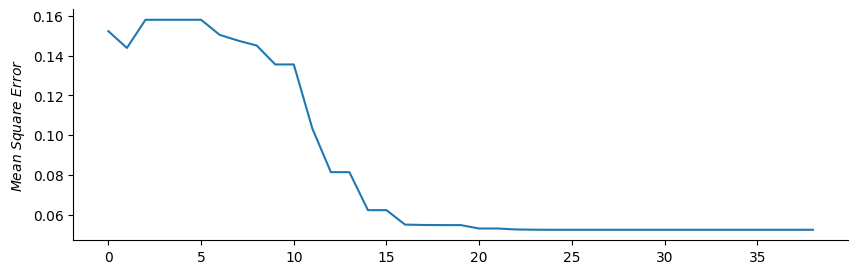

In [ ]:
################################################################################
# Plotting simulation error curve (objective function)
################################################################################
# --- Plot figure
fig1 , ax = plt.subplots(1, 1, figsize=(10, 3))

ax.plot(error_vec)
ax.set(ylabel=r'$Mean\ Square\ Error$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

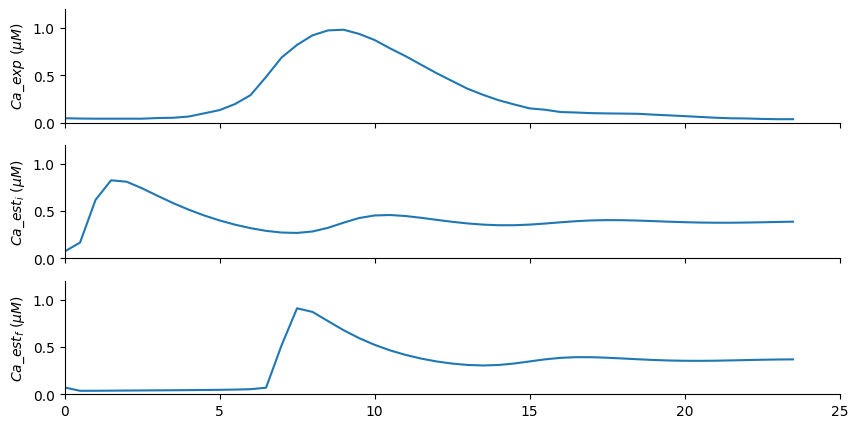

In [ ]:
################################################################################
# Plotting comparison among experimental, initial model and optimized model Calcium
################################################################################
# --- Get model output for initial parameters
Ca_estimated_i = get_astro_model_data(get_initial_params())
# --- Get model output for optimized parameters
Ca_estimated_f = get_astro_model_data(x)

# --- Plot figures
fig2 , axes = plt.subplots(3, 1, sharex=True,
                        gridspec_kw={'height_ratios': (1, 1, 1)}, figsize=(10, 5))

axes[0].plot(Ca_estimated_i.ts, Ca_experimental)
axes[0].set(xlim=(0, 25), ylim=[0, 1.2],
          ylabel=r'$Ca\_exp$ ($\mu M$)')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

axes[1].plot(Ca_estimated_i.ts, Ca_estimated_i.ys[0])
axes[1].set(xlim=(0, 25), ylim=[0, 1.2],
          ylabel=r'$Ca\_est_i$ ($\mu M$)')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

axes[2].plot(Ca_estimated_f.ts, Ca_estimated_f.ys[0])
axes[2].set(xlim=(0, 25), ylim=[0, 1.2],
          ylabel=r'$Ca\_est_f$ ($\mu M$)')
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)


# **Gauss-Newton Method Theory**

---


This method is a least-squares problem where we want to find a solution for the nonlinear objective function of the form:

$f(x) = \frac{1}{2} \displaystyle \sum_{j=1}^{m}{r_j^2(x)}$

It can be seen as a modified version of the Newton's method with line search. Instead of solving the Newton equations $\nabla^2f(x_k)p = -\nabla f(x_k)$, we solve $J_k^TJ_kp_k^{GN} = -J_k^Tr_k$ `10.23` to obtain the search direction $p_k^{GN}$.
<br>
<br>
<br>
The jacobian $J_k$ could not have full rank for all $x_k$, which may drive the approximate Hessian to be non invertible. To avoid this, we use a pseudo-inverse. Furthermore, given the similarity between `10.23` and the equations for the linear least-squares problem, we find that $p_k^{GN}$ is in fact the solution for the latest. Thus, we can find the searh direction by applying a linear least-squares algorithm to the subproblem:

$\displaystyle \min_{p} \frac{1}{2} \|J_kp + r_k\|^2$  

# **Gauss-Newton Method Implementation Code**


---


In [ ]:
def residuals_func(x, Ca_experimental):

    #############################################################################
    # --- Residual function computation
    #############################################################################
    # --- Set solution parameters
    term = ODETerm(astro_ca_model)
    solver = Dopri5()
    t0 = 0
    t1= 23.5
    dt0 = 0.001
    # --- Initial values for Ca, h and IP3
    y0 = (0.072495, 0.886314, 0.820204)
    # --- Compute Astrocyte Ca model output
    args = x
    saveat = SaveAt(ts=jnp.linspace(t0, t1, 48))
    sol = diffeqsolve(term, solver, t0, t1, dt0, y0, args=args,
                     adjoint=DirectAdjoint(), saveat=saveat, max_steps=250000)
    Ca_estimated = sol.ys[0]

    # --- Residuals
    residuals = jnp.subtract(Ca_estimated, Ca_experimental)

    return residuals

In [ ]:
################################################################################
# Gauss-Newton Method computation
################################################################################
# --- Method parameters
g_tol = 0.001
error_tol = 15
error_tol_sum = 0
# --- Experimental data loading
Ca_experimental = get_experimental_data().astype(np.float32)
# --- Initial point
x0 = get_initial_params()
x = x0
# --- Create vectors to save simulation data
error_vec = jnp.array([])

while True:
    # --- Compute the residuals vector
    residuals = residuals_func(x, Ca_experimental)
    # --- Compute mean square error
    mse = obj_function(x, Ca_experimental)
    error_vec = jnp.append(error_vec, mse)
    print('--------> Error: {}'.format(mse))
    # --- Compute the Jacobian of the residuals function
    J = jacobian(residuals_func)
    J_x = J(x, Ca_experimental)
    # --- Compute the Gauss-Newton Hessian approximation
    B_x = jnp.matmul(jnp.transpose(J_x), J_x)
    # --- Computes the gradient
    g_x = jnp.matmul(jnp.transpose(J_x), residuals)
    norm_g = jnp.linalg.norm(g_x)
    # ---
    # --- Solve the linear least-squares subproblem
    #p, _, _, _ = jnp.linalg.lstsq(J_x[0], -residuals)
    # --- Compute the Gauss-Newton step
    p = -jnp.matmul(jnp.linalg.pinv(B_x), g_x)
    print('-----------> p: {}'.format(p))

    # --- If not decreasing enough, stop the algorithm
    print('-----------> Norm_g: {}'.format(norm_g))
    if jnp.linalg.norm(g_x) < g_tol:
        break

    # --- Updates x if next residuals are valid
    if not jnp.isnan(jnp.sum(residuals_func(jnp.add(x, p), Ca_experimental))):
        x = jnp.add(x, p)
        print('----------> Update x')
    else:
        break


--------> Error: 0.11505529284477234
-----------> p: [-4.5902007e-03  2.0788137e-03 -1.7526480e-03  2.6522323e-03
  2.6271474e-03  5.5596372e-04  1.2034037e-03 -5.5031469e-06
  3.6988981e-02 -1.8548850e-05  9.1488950e-04 -2.0557852e-03
  1.7032149e-04  1.9616716e-02  7.5790272e-03 -3.9842533e-05
  3.0960009e-06  3.4769437e-05  1.6199237e-03 -1.3254728e-04]
-----------> Norm_g: 981.362060546875
----------> Update x
--------> Error: 0.11558329313993454
-----------> p: [ 8.1481233e-02 -2.6958384e-02  2.4495883e-02  2.9002899e-01
 -8.2876936e-02  1.2900671e-01 -2.9056292e-02  2.4433897e-03
 -3.2963961e-02 -1.2293301e-02  1.5149692e+00  1.7592800e+00
  2.8851993e-02  3.8315460e-02 -4.7195154e-01 -1.9860597e-02
  7.1991869e-04  2.5099123e-02 -1.1373444e+00 -8.6803570e-02]
-----------> Norm_g: 33.18574905395508


## **Analysis and plotting**


---

In [ ]:
################################################################################
# Prints resulting parameters (optimized)
################################################################################
x

Array([1.9954098 , 0.18707882, 3.9982474 , 0.11265223, 2.2026272 ,
       0.05055596, 0.5012034 , 0.9999945 , 0.13698898, 0.15998144,
       0.13091488, 1.0469443 , 0.9435704 , 0.10161672, 0.14757903,
       0.29996017, 1.1000031 , 0.80003476, 0.14161992, 1.9998674 ],      dtype=float32)

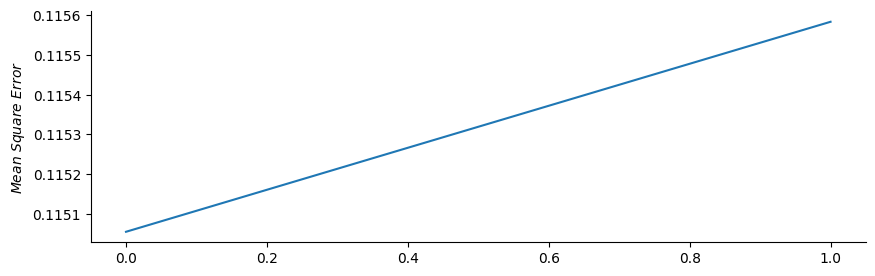

In [ ]:
################################################################################
# Plotting simulation error curve (objective function)
################################################################################
# --- Plot figure
fig1 , ax = plt.subplots(1, 1, figsize=(10, 3))

ax.plot(error_vec)
ax.set(ylabel=r'$Mean\ Square\ Error$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

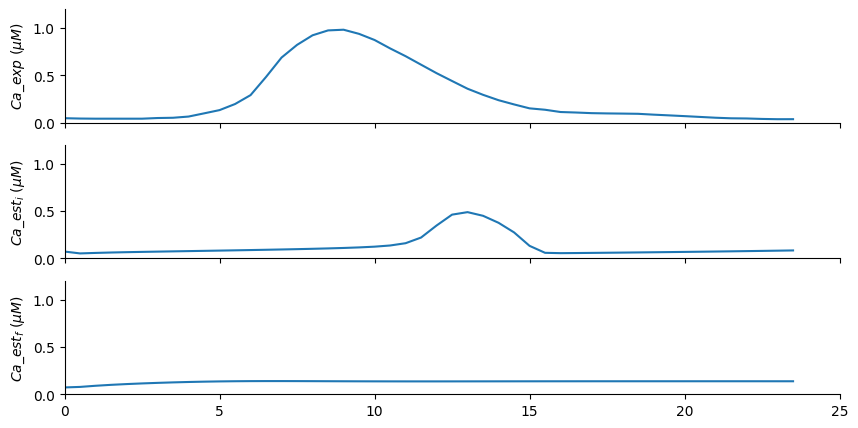

In [ ]:
################################################################################
# Plotting comparison among experimental, initial model and optimized model Calcium
################################################################################
# --- Get model output for initial parameters
Ca_estimated_i = get_astro_model_data(get_initial_params())
# --- Get model output for optimized parameters
Ca_estimated_f = get_astro_model_data(x)

# --- Plot figures
fig2 , axes = plt.subplots(3, 1, sharex=True,
                        gridspec_kw={'height_ratios': (1, 1, 1)}, figsize=(10, 5))

axes[0].plot(Ca_estimated_i.ts, Ca_experimental)
axes[0].set(xlim=(0, 25), ylim=[0, 1.2],
          ylabel=r'$Ca\_exp$ ($\mu M$)')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

axes[1].plot(Ca_estimated_i.ts, Ca_estimated_i.ys[0])
axes[1].set(xlim=(0, 25), ylim=[0, 1.2],
          ylabel=r'$Ca\_est_i$ ($\mu M$)')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

axes[2].plot(Ca_estimated_f.ts, Ca_estimated_f.ys[0])
axes[2].set(xlim=(0, 25), ylim=[0, 1.2],
          ylabel=r'$Ca\_est_f$ ($\mu M$)')
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)

# **Discussion**

---

The equations system presented here for the Calcium dynamics in the Astrocytes is a coupled system of 3 dufferential equations depending on multiple current densities accounting for different biologically complex processes. The solution of this equations system appears to be extremely sensitive to small perturbations on some of the parameters, adding to the difficulty for the optimization task. However, the initial values used are taken from the literature reporting values found in experimental sets in vitro and in vivo. Such initial values should position the algorithms in a place near the minimum, making them suitable as a starting point to run from.
<br>
<br>
Gauss-Newton method is simpler and faster as it does not need to directly compute the Hessian, but can fail for bad initial guesses or ill-conditioned problems. If $J^\top J$ is ill-conditioned, the update $\Delta p_k  = −(J^\top J)^{−1} J^\top r$  blows up. On the other hand, taking steps along the direction $p_k^{GN}$ with no step lenght definition (this method has no line search implementation by default), makes it easy for the method to go away from the minimum. Simulation results show how the equations system goes unstable after few iterations of this method, obtaining almost no optimization on the parameters.
<br>
<br>
Trust-Region method is a bit more complex to imlpement and has more computational cost. However, the constant definition of the direction $p_k$ and the trust region radius $\Delta_k$ gives it the flexibility needed to maintain an stable decrement on the objective function for the Calcium eaquations system. Moreover, using the actual Hessian $\nabla ^2 f(x_k)$ for $B_k$ when posible, speeds the process of convergence. Simulation results shows the objective function decreasing consistently unitl reaching convergence, obtaining a set of parameters that gives interesting results at fitting the experimental Calcium curve. As can be seen in the corresponding figures, the obtained curve is aligned in the temporal axis to the experimental one, with a similar rising interval.
<br>
<br>
The Levenberg-Marquardt method can be use as an improvement for the Gaussian-Newton method, by regularizing the Hessian $
(J^\top J + \lambda I) \, \Delta \theta = -J^\top r$. It is interesting how combining the Gaussian-Newton principles with the trust region like search for the direction improves the results as shown in the following, where the curve for the optimized parameters fits really well to the experimental.

# **Levenberg-Marquardt Method Implementation**

---

In [ ]:
################################################################################
# Levenberg-Marquardt Method computation
################################################################################
# --- Method parameters
lambda_val = 1e-3
max_iter=100
tol=1e-3
v=2
# --- Experimental data loading
Ca_experimental = get_experimental_data().astype(np.float32)
# --- Initial point
x0 = get_initial_params()
x = x0


for i in range(max_iter):
    print(f"Iteration {i}: lambda = {lambda_val}")

    # Calculate residuals and Jacobian at the current parameters
    r = residuals_func(x, Ca_experimental)
    J = jacobian(residuals_func)(x, Ca_experimental)

    JTJ = J.T @ J
    JTr = J.T @ r

    A = JTJ + lambda_val * np.eye(JTJ.shape[0])

    # Solve the modified normal equations
    delta_params = np.linalg.solve(A, -JTr)

    new_params = x + delta_params
    r_new = residuals_func(new_params, Ca_experimental)
    print(f"r_new: {np.linalg.norm(r_new)}", f"r_old: {np.linalg.norm(r)}")

    if np.linalg.norm(r_new) < np.linalg.norm(r):
        x = new_params
        lambda_val /= v
        print(f"params: {x}")
    else:
        lambda_val *= v

    if np.linalg.norm(delta_params) < tol:
        break

Iteration 0: lambda = 0.001
r_new: nan r_old: 2.3500640392303467
Iteration 1: lambda = 0.002
r_new: nan r_old: 2.3500640392303467
Iteration 2: lambda = 0.004
r_new: nan r_old: 2.3500640392303467
Iteration 3: lambda = 0.008
r_new: nan r_old: 2.3500640392303467
Iteration 4: lambda = 0.016
r_new: 504.0059814453125 r_old: 2.3500640392303467
Iteration 5: lambda = 0.032
r_new: 711.524658203125 r_old: 2.3500640392303467
Iteration 6: lambda = 0.064
r_new: 2524.476806640625 r_old: 2.3500640392303467
Iteration 7: lambda = 0.128
r_new: 331.0059814453125 r_old: 2.3500640392303467
Iteration 8: lambda = 0.256
r_new: 665.831298828125 r_old: 2.3500640392303467
Iteration 9: lambda = 0.512
r_new: nan r_old: 2.3500640392303467
Iteration 10: lambda = 1.024
r_new: nan r_old: 2.3500640392303467
Iteration 11: lambda = 2.048
r_new: nan r_old: 2.3500640392303467
Iteration 12: lambda = 4.096
r_new: nan r_old: 2.3500640392303467
Iteration 13: lambda = 8.192
r_new: 6.458690643310547 r_old: 2.3500640392303467
Iter

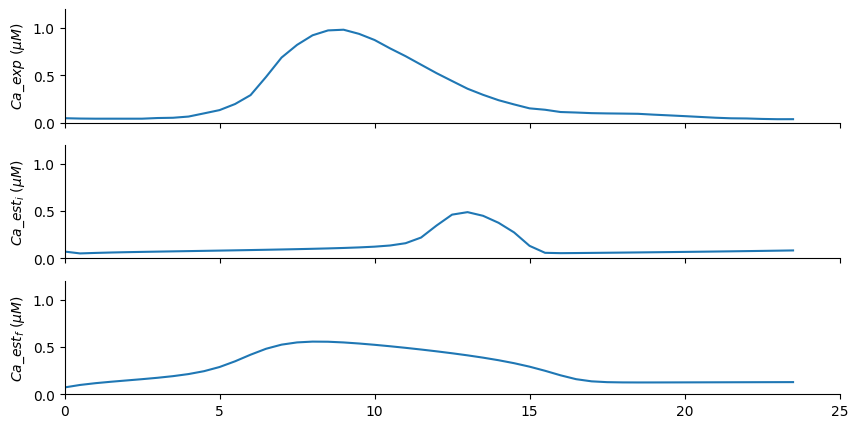

In [ ]:
################################################################################
# Plotting comparison among experimental, initial model and optimized model Calcium
################################################################################
# --- Get model output for initial parameters
Ca_estimated_i = get_astro_model_data(get_initial_params())
# --- Get model output for optimized parameters
Ca_estimated_f = get_astro_model_data(x)

# --- Plot figures
fig2 , axes = plt.subplots(3, 1, sharex=True,
                        gridspec_kw={'height_ratios': (1, 1, 1)}, figsize=(10, 5))

axes[0].plot(Ca_estimated_i.ts, Ca_experimental)
axes[0].set(xlim=(0, 25), ylim=[0, 1.2],
          ylabel=r'$Ca\_exp$ ($\mu M$)')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

axes[1].plot(Ca_estimated_i.ts, Ca_estimated_i.ys[0])
axes[1].set(xlim=(0, 25), ylim=[0, 1.2],
          ylabel=r'$Ca\_est_i$ ($\mu M$)')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

axes[2].plot(Ca_estimated_f.ts, Ca_estimated_f.ys[0])
axes[2].set(xlim=(0, 25), ylim=[0, 1.2],
          ylabel=r'$Ca\_est_f$ ($\mu M$)')
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)